### Group B: Machine Learning

#### Assignment B3
Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 

Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

Perform following steps:

1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
import warnings

In [136]:
warnings.filterwarnings("ignore")

In [137]:
df = pd.read_csv('/Users/shreyas/Downloads/RAW/Mini-Pro/Churn_Modelling.csv')

In [138]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [139]:
df.shape

(10000, 14)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [141]:
df['RowNumber'].value_counts()

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

In [142]:
df['RowNumber'].nunique()

10000

In [143]:
df['CustomerId'].nunique()

10000

In [144]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [145]:
df.shape

(10000, 11)

In [146]:
df.duplicated().sum()

0

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: xlabel='Gender'>

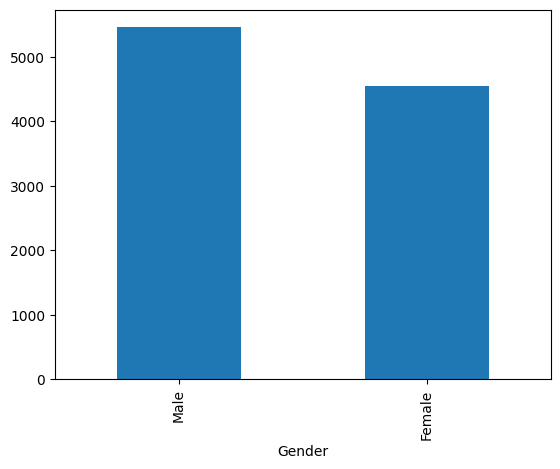

In [148]:
df['Gender'].value_counts().plot(kind='bar')

In [149]:
grp = df.groupby('Gender')['Exited'].value_counts()
grp

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: count, dtype: int64

<Axes: xlabel='Geography'>

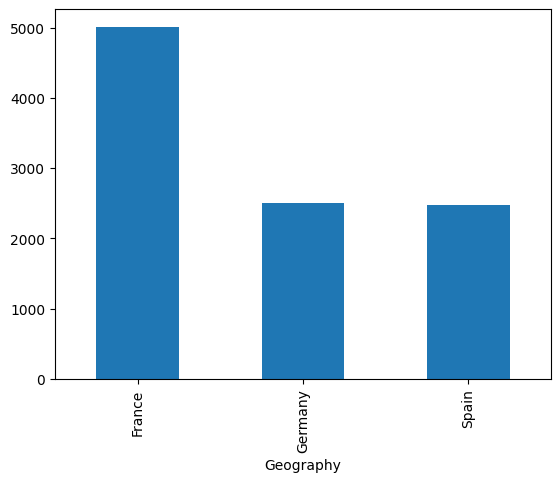

In [150]:
df['Geography'].value_counts().plot(kind='bar')

In [151]:
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

In [152]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [153]:
df.to_csv('analytical_base_table.csv', index=None)

In [154]:
pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [156]:
import tensorflow as tf
# from keras_tuner.tuners import RandomSearch

In [157]:
df = pd.read_csv('analytical_base_table.csv')

In [158]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [159]:
x=df.drop(['Exited'],axis=1)
x.shape

(10000, 10)

In [160]:
y=df['Exited']
y.shape

(10000,)

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [163]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [164]:
x_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,739,Germany,Male,32,3,102128.27,1,1,0,63981.37


In [165]:
x_train.reset_index(drop=True,inplace=True)

In [166]:
x_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,753,France,Male,57,7,0.00,1,1,0,159475.08
1,739,Germany,Male,32,3,102128.27,1,1,0,63981.37


In [167]:
from sklearn.preprocessing import OneHotEncoder

In [168]:
ohe = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore')

In [169]:
ohe.fit(x_train[['Gender','Geography']])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

In [170]:
x_train_encoded = ohe.transform(x_train[['Gender','Geography']])

In [171]:
x_train_encoded

array([[1., 0., 0.],
       [1., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 1.],
       [1., 0., 1.]])

In [172]:
x_train_new = pd.DataFrame(x_train_encoded, columns = ohe.get_feature_names_out(['Gender', 'Geography']))
x_train_new

,Gender_Male,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,1.0,0.0
...,...,...,...
7995,0.0,0.0,1.0
7996,1.0,0.0,1.0
7997,0.0,0.0,0.0
7998,1.0,0.0,1.0


In [173]:
x_train1 = pd.concat([x_train,x_train_new],axis=1)
x_train1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,753,France,Male,57,7,0.00,1,1,0,159475.08,1.0,0.0,0.0
1,739,Germany,Male,32,3,102128.27,1,1,0,63981.37,1.0,1.0,0.0


In [174]:
x_train1.drop(['Geography','Gender'],axis=1,inplace=True)
x_train1.shape

(8000, 11)

In [175]:
x_test.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5702,585,France,Male,36,7,0.00,2,1,0,94283.09
3667,525,Germany,Male,33,4,131023.76,2,0,0,55072.93


In [176]:
x_test.reset_index(drop=True,inplace=True)
x_test.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,585,France,Male,36,7,0.00,2,1,0,94283.09
1,525,Germany,Male,33,4,131023.76,2,0,0,55072.93


In [177]:
ohe.fit(x_test[['Gender','Geography']])
x_test_encoded = ohe.transform(x_test[['Gender','Geography']])
x_test_new = pd.DataFrame(x_test_encoded,columns=ohe.get_feature_names_out(['Gender','Geography']))
x_test_new

,Gender_Male,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
1995,1.0,0.0,0.0
1996,1.0,1.0,0.0
1997,0.0,1.0,0.0
1998,1.0,0.0,0.0


In [178]:
x_test1 = pd.concat([x_test,x_test_new],axis=1)
x_test1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,585,France,Male,36,7,0.00,2,1,0,94283.09,1.0,0.0,0.0
1,525,Germany,Male,33,4,131023.76,2,0,0,55072.93,1.0,1.0,0.0


In [179]:
x_test1.drop(['Geography','Gender'],axis=1,inplace=True)
x_test1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,585,36,7,0.00,2,1,0,94283.09,1.0,0.0,0.0
1,525,33,4,131023.76,2,0,0,55072.93,1.0,1.0,0.0
2,557,40,4,0.00,2,0,1,105433.53,0.0,0.0,1.0
3,639,34,5,139393.19,2,0,0,33950.08,1.0,0.0,1.0
4,640,34,3,77826.80,1,1,1,168544.85,0.0,0.0,1.0


In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
sc = MinMaxScaler()
sc.fit(x_train1)
x_train1_sc = sc.transform(x_train1)
x_test1_sc = sc.transform(x_test1)

In [182]:
x_train1_sc.shape

(8000, 11)

In [183]:
type(x_train1_sc)

numpy.ndarray

In [184]:
import tensorflow.keras as tk

In [185]:
# instantiate the model
model = tk.Sequential()

In [186]:
# Adding the input layer
model.add(tk.layers.Input(shape=(11,)))
# Adding the first hidden layer
model.add(tk.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer
model.add(tk.layers.Dense(units=6,activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer
model.add(tk.layers.Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [187]:
# Compiling the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['Precision','accuracy'])

In [188]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [189]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
x_train1_sc.shape,x_test1_sc.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [191]:
import time

In [192]:
# Training the model
start = time.time()
model.fit(x=x_train1_sc,
        y=y_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test1_sc,y_test))
end=time.time()
print(end-start)

Epoch 1/100
250/250 [==============================] - 0s 828us/step - loss: 0.6650 - precision: 0.1294 - accuracy: 0.6474 - val_loss: 0.5698 - val_precision: 0.0000e+00 - val_accuracy: 0.7965
Epoch 2/100
250/250 [==============================] - 0s 483us/step - loss: 0.5300 - precision: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.5069 - val_precision: 0.0000e+00 - val_accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 0s 508us/step - loss: 0.4936 - precision: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.4866 - val_precision: 0.0000e+00 - val_accuracy: 0.7965
Epoch 4/100
250/250 [==============================] - 0s 508us/step - loss: 0.4703 - precision: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.4684 - val_precision: 0.0000e+00 - val_accuracy: 0.7965
Epoch 5/100
250/250 [==============================] - 0s 498us/step - loss: 0.4576 - precision: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.4593 - val_precision: 0.0000e+00 - val_accuracy: 0.7965
Epoch 6/100
250/250